# Practico Mentoria - Introduccion al Aprendizaje Automatico
<h3><FONT COLOR="#FF0000"> Alumno: Flavio Olivier (Omega)</FONT></h3>

---

### Importaciones

In [1]:
#paquetería...

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from collections import OrderedDict
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn import preprocessing

from ml.visualization import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [2]:
#sns.set_style("whitegrid")
#sns.set_context('talk')

In [3]:
# Seteamos una semilla para Reproducibilidad
np.random.seed(1)


---

### Carga de los Datesets

In [4]:
#daterio...

path = 'https://raw.githubusercontent.com/diplodatos2019mentoria/Analisis_Visualizacion_Datos/master/'

player_df = pd.read_csv(path + 'Datasets/football_player.csv')
team_df = pd.read_csv(path + 'Datasets/football_team.csv')
match_df = pd.read_csv(path + 'Datasets/football_match.csv')

print("Shape 'player_df' = {}".format(player_df.shape))
print("Shape 'team_df'   = {}".format(team_df.shape))
print("Shape 'match_df'  = {}".format(match_df.shape))


Shape 'player_df' = (9925, 44)
Shape 'team_df'   = (288, 22)
Shape 'match_df'  = (25979, 15)


---

## **Regresion**

Vamos a predecir el `overall_rating` de un jugador

In [5]:
# Separamos el "target" del resto del dataset

X = player_df.loc[:, player_df.columns != 'overall_rating']
y = player_df['overall_rating']

In [6]:
player_df.dtypes

player_name             object
birthday                object
age                      int64
height_m               float64
weight_kg              float64
imc                    float64
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
intercep

In [7]:
set(player_df.columns).difference(set(X.columns))

{'overall_rating'}

Seleccionamos un feature de los listados en la descripción que no sea categórico, por ejemplo `vision`

In [8]:
# TODO: modificar esta feature por algún otro (o una combinacion de estos) para ver como cambian los resultados
X = X[[
    'vision',
]]

In [9]:
#una estrategia para dividir train/test podría ser "barajar" la data y separarla 70/30 para entrenar y validar...

#X = 'vision'
#y = 'overall_rating'
TrainTest = .7

m_player_df = np.random.permutation(player_df.shape[0])
m_train = m_player_df[:int(player_df.shape[0] * TrainTest)]
m_valid = m_player_df[int(player_df.shape[0] * TrainTest):]

X_train = X.loc[m_train]
y_train = y.loc[m_train]

X_valid = X.loc[m_valid]
y_valid = y.loc[m_valid]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape


((6947, 1), (6947,), (2978, 1), (2978,))

### División de datos en conjuntos de entrenamiento y evaluación

La primer tarea consiste en dividir el conjunto de datos cargados en el apartado anterior en conjuntos de entrenamiento (o _training_) y evaluación (o _test_).

Utilizar aproximadamente 70% de los datos para entrenamiento y 30% para validación.

Links:
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [10]:
#más pro es usar scikit learn...

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape


((6947, 1), (6947,), (2978, 1), (2978,))

> ### Regresion Lineal

Link:
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [11]:
#entrenamos un clasificador...

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Evaluamos el desempeño del clasificador utilizando la media del error cuadrado (MSE o Mean Squared Error) sobre el conjunto de datos de entrenamiento (`X_train`, `y_train`) y lo comparamos con el de validación (`X_val`, `y_test`).  
Mientras más cercano a cero mejor

In [12]:
print(
    "MSE para entrenamiento: {:.2f}"
    .format(mean_squared_error(y_train, model.predict(X_train)))
)
print(
    "MSE para validación   : {:.2f}"
    .format(mean_squared_error(y_valid, model.predict(X_valid)))
)

MSE para entrenamiento: 29.03
MSE para validación   : 28.92


#### **Visualizacion**

**Warning**: Tener en cuenta que si son dos o mas features no se va a poder visualizar

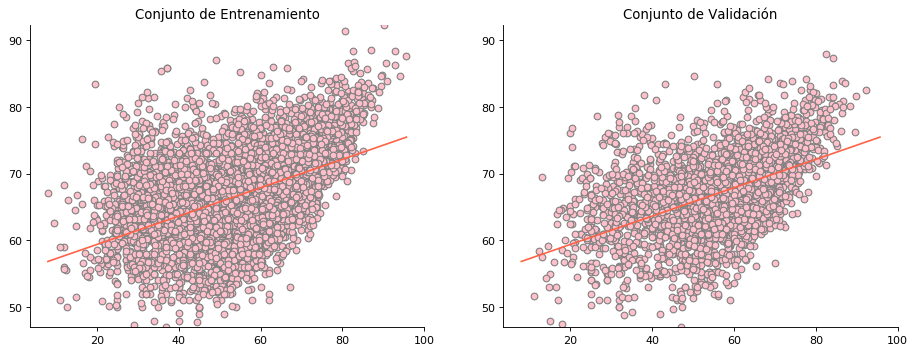

In [13]:
#

plt.figure(figsize = (14, 5), dpi = 80, facecolor = 'w', edgecolor = 'k')

X_range_start = np.min(np.r_[X_train, X_valid])
X_range_stop = np.max(np.r_[X_train, X_valid])
y_range_start = np.min(np.r_[y_train, y_valid])
y_range_stop = np.max(np.r_[y_train, y_valid])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, facecolor = 'pink', edgecolor = 'grey', label = "datos")
plt.plot(X_linspace, model.predict(X_linspace), color = "tomato", label = "modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_valid, y_valid, facecolor = 'pink', edgecolor = 'grey', label = "datos")
plt.plot(X_linspace, model.predict(X_linspace), color = "tomato", label = "modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

sns.despine()
plt.show()


> ### Regresión Polinomial

Link:
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [14]:
polynomial_degree = 1# TODO: Probar distintos grados del polinomio

poly_features = PolynomialFeatures(polynomial_degree)
poly_features.fit(X_train)
X_poly_train = poly_features.transform(X_train)
X_poly_test = poly_features.transform(X_valid)

model = LinearRegression()
model.fit(X_poly_train, y_train)

print(
    "MSE para entrenamiento: {:.2f}"
    .format(mean_squared_error(y_train, model.predict(X_poly_train)))
)
print(
    "MSE para validación   : {:.2f}"
    .format(mean_squared_error(y_valid, model.predict(X_poly_test)))
)

MSE para entrenamiento: 29.03
MSE para validación   : 28.92


#### **Visualizacion**

**Warning**: Tener en cuenta que si son mas de dos features no se va a poder visualizar

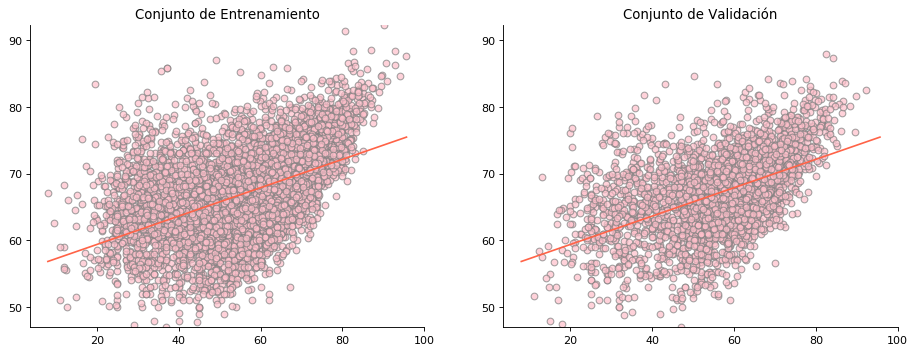

In [15]:
#

plt.figure(figsize = (14, 5), dpi = 80, facecolor = 'w', edgecolor = 'k')

X_range_start = np.min(np.r_[X_train, X_valid])
X_range_stop = np.max(np.r_[X_train, X_valid])
y_range_start = np.min(np.r_[y_train, y_valid])
y_range_stop = np.max(np.r_[y_train, y_valid])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
X_linspace_poly = poly_features.transform(X_linspace)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, facecolor = 'pink', edgecolor = 'grey', label = "datos", alpha = .7)
plt.plot(X_linspace, model.predict(X_linspace_poly), color = "tomato", label = "modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_valid, y_valid, facecolor = 'pink', edgecolor = 'grey', label = "datos", alpha = .7)
plt.plot(X_linspace, model.predict(X_linspace_poly), color = "tomato", label = "modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

sns.despine()
plt.show()


---

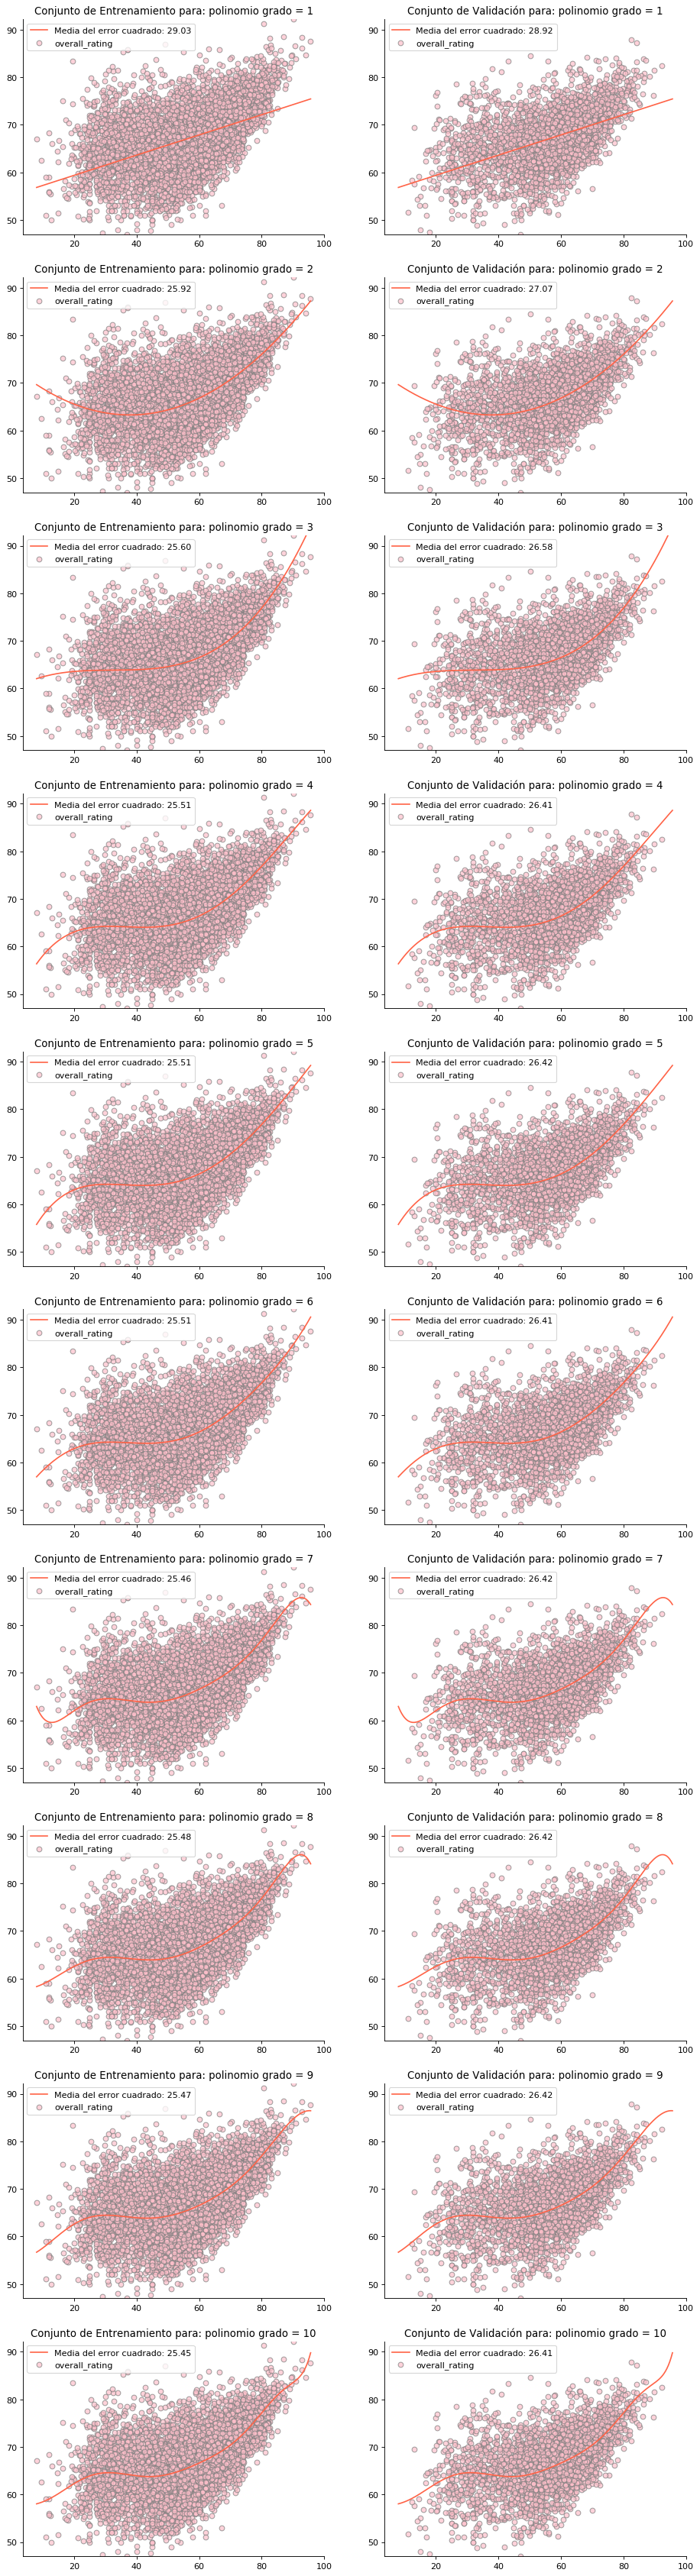

In [17]:
#realizo el experimento de iterar grados en un ciclo for de 1 a 10.

plt.figure(figsize = (14, 55), dpi = 80, facecolor = 'w', edgecolor = 'k')

pos = 0
for i in range(1, 11):
    poly_features = PolynomialFeatures(i)
    poly_features.fit(X_train)
    X_poly_train = poly_features.transform(X_train)
    X_poly_val = poly_features.transform(X_valid)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    X_range_start = np.min(np.r_[X_train, X_valid])
    X_range_stop = np.max(np.r_[X_train, X_valid])
    y_range_start = np.min(np.r_[y_train, y_valid])
    y_range_stop = np.max(np.r_[y_train, y_valid])
    X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
    X_linspace_poly = poly_features.transform(X_linspace)

    # Conjunto de entrenamiento
    plt.subplot(10, 2, pos + 1)
    plt.scatter(X_train, y_train, facecolor = 'pink', edgecolor = 'grey', alpha = .7)
    plt.plot(X_linspace, model.predict(X_linspace_poly), color = "tomato", label = 'Media del error cuadrado: %.2f' % mean_squared_error(y_train, model.predict(X_poly_train)))
    plt.ylim(y_range_start, y_range_stop)
    titulo = 'Conjunto de Entrenamiento para: polinomio grado = ' + str(i)
    plt.title(titulo)
    plt.legend()

    # Conjunto de validación
    plt.subplot(10, 2, pos + 2)
    plt.scatter(X_valid, y_valid, facecolor = 'pink', edgecolor = 'grey', alpha = .7)
    plt.plot(X_linspace, model.predict(X_linspace_poly), color = "tomato", label = 'Media del error cuadrado: %.2f' % mean_squared_error(y_valid, model.predict(X_poly_val)))
    plt.ylim(y_range_start, y_range_stop)
    titulo = 'Conjunto de Validación para: polinomio grado = ' + str(i)
    plt.title(titulo)
    plt.legend()
    
    pos= pos+2

sns.despine()
plt.show()


## **Clasificacion Multiclase**

Vamos a predecir el `attacking_work_rate` de un jugador

In [18]:
# Separamos el "target" del resto del dataset

X = player_df.loc[:, player_df.columns != 'attacking_work_rate']
y = player_df['attacking_work_rate']


In [19]:
# TODO: Codificar la variable categorica `attacking_work_rate` como una variable numerica

player_df['attacking_work_rate'].value_counts()


medium    7350
high      2112
low        463
Name: attacking_work_rate, dtype: int64

In [20]:
#
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
xx = le.fit_transform(player_df['attacking_work_rate'])

if 'attacking_work_rate_le' in player_df.columns:
    player_df.drop('attacking_work_rate_le', axis = 1, inplace = True)

player_df.insert(0, 'attacking_work_rate_le', xx)

print(set(zip(le.classes_, le.transform(le.classes_))))
player_df['attacking_work_rate_le'].value_counts()

y = player_df['attacking_work_rate_le']


{('low', 1), ('high', 0), ('medium', 2)}


In [21]:
#correlación con 'attacking_work_rate'...

player_df.corr().attacking_work_rate_le.sort_values(ascending = False)


attacking_work_rate_le    1.000000
gk_reflexes               0.177222
gk_positioning            0.176492
gk_diving                 0.176237
gk_handling               0.175447
height_m                  0.172815
gk_kicking                0.162813
weight_kg                 0.141334
strength                  0.040881
age                       0.032631
imc                       0.007629
marking                   0.000154
standing_tackle          -0.015105
sliding_tackle           -0.017959
interceptions            -0.021757
jumping                  -0.064929
aggression               -0.093269
heading_accuracy         -0.122872
long_passing             -0.128010
potential                -0.148803
overall_rating           -0.151677
reactions                -0.173232
free_kick_accuracy       -0.191262
short_passing            -0.193876
vision                   -0.198866
penalties                -0.200482
balance                  -0.212969
shot_power               -0.230574
volleys             

Seleccionamos un feature de los listados en la descripción que no sea categórico, por ejemplo `vision`

In [22]:
# TODO: modificar esta feature por algún otro (o una combinacion de estos) para ver como cambian los resultados
X = X[[
    'sprint_speed',
]]

### División de datos en conjuntos de entrenamiento y evaluación

La primer tarea consiste en dividir el conjunto de datos cargados en el apartado anterior en conjuntos de entrenamiento (o _training_) y evaluación (o _test_).

Utilizar aproximadamente 70% de los datos para entrenamiento y 30% para validación.

In [23]:
# TODO

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape


((6947, 1), (6947,), (2978, 1), (2978,))

> ### Regresion Logistica

In [24]:
#
from sklearn.metrics import balanced_accuracy_score

penalty = 'l2'# TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
alpha = 2# TODO: Parámetro de regularización. También denominado como parámetro `lambda`. Debe ser mayor que 0.

model = LogisticRegression(penalty = penalty, C = 1./alpha, multi_class = 'ovr')
model.fit(X_train, y_train)

print("Accuracy para entrenamiento: {:.2f}".format(balanced_accuracy_score(y_train, model.predict(X_train))))
print("Accuracy para validación   : {:.2f}".format(balanced_accuracy_score(y_valid, model.predict(X_valid))))


Accuracy para entrenamiento: 0.36
Accuracy para validación   : 0.35


#### **Matriz de Confusion**

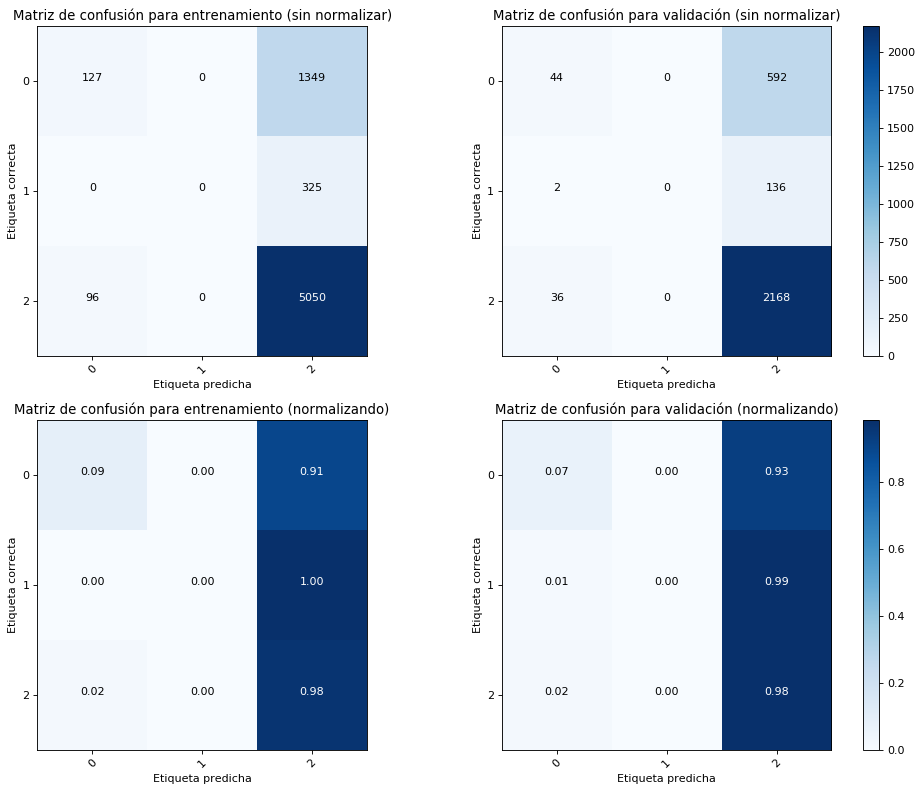

In [25]:
#

plt.figure(figsize = (14, 10), dpi = 80, facecolor = 'w', edgecolor = 'k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(
    confusion_matrix(y_train, model.predict(X_train)),
    classes = np.unique(y),
    title = 'Matriz de confusión para entrenamiento (sin normalizar)'
)

plt.subplot(2, 2, 3)
plot_confusion_matrix(
    confusion_matrix(y_train, model.predict(X_train)),
    classes=np.unique(y),
    normalize = True,
    title = 'Matriz de confusión para entrenamiento (normalizando)'
)

plt.subplot(2, 2, 2)
plot_confusion_matrix(
    confusion_matrix(y_valid, model.predict(X_valid)),
    classes = np.unique(y),
    title = 'Matriz de confusión para validación (sin normalizar)'
)

plt.subplot(2, 2, 4)
plot_confusion_matrix(
    confusion_matrix(y_valid, model.predict(X_valid)),
    classes = np.unique(y),
    normalize = True,
    title = 'Matriz de confusión para validación (normalizando)'
)

plt.show()


#### Seleccion de Hiperparametros

Utilizando búsqueda exhaustiva (*grid search*) con *n-fold cross-validation* (por ejemeplo *5-fold*) y utilizando como métrica la **Accuracy**, hagan una selección de los mejores hiperparámetros para su conjunto de datos y el modelo que hayan elegido en el apartado anterior.

Links:
* https://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.GridSearchCV.html

In [26]:
#
from sklearn.model_selection import GridSearchCV

#creamos el logistic regression...
logistic = LogisticRegression(random_state = 42)

#alternativas penalty...
penalty = ['l1', 'l2'] # l1 lasso l2 ridge.

#alternativas regularización...
C = np.logspace(0, 4, 10)

#hiperparámetros...
hyperp = dict(C = C, penalty = penalty)

#creamos grid search de 5-fold...
clf = GridSearchCV(logistic, hyperp, cv = 5, scoring = 'accuracy', verbose = 0)

#fiteamos grid search...
best_model = clf.fit(X_train, y_train)

#encontramos los mejores hyperp...
print('Mejor Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Mejor C:', best_model.best_estimator_.get_params()['C'])


Mejor Penalty: l2
Mejor C: 166.81005372000593


In [27]:
#Accuracy = (TP + TN) / n...

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_valid)

accuracy_train = accuracy_score(y_train, y_train_pred)
print('Accuracy para entrenamiento: %.8f' %  accuracy_score(y_train, y_train_pred))

accuracy_test = accuracy_score(y_valid, y_test_pred)
print('Accuracy para validación: %.8f' % accuracy_score(y_valid, y_test_pred))


Accuracy para entrenamiento: 0.74435008
Accuracy para validación: 0.74916051


---

**Comunicación de Resultados**

Se pide que toda esta información no quede plasmada solamente en un Jupyter Notebook, sino que se diagrame una comunicación en formato textual o interactivo (Google Docs, PDF o Markdown por ejemplo).

La comunicación debe estar apuntada a un público técnico pero sin conocimiento del tema particular, como por ejemplo, sus compañeros de clase.